In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPool2D, Lambda, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
df=pd.read_csv('mnist_train.csv')

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df['label']

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [5]:
train_data

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_label=df[df.columns[0:1]]

In [7]:
train_label

,label
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

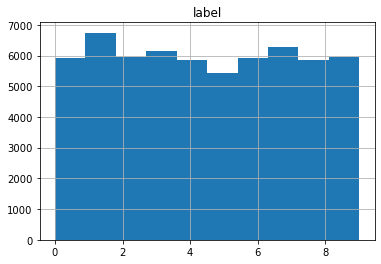

In [8]:
train_label.hist()

In [9]:
test_data=pd.read_csv('mnist_test.csv')

In [10]:
test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_data=test_data[test_data.columns[1:60001]]

In [12]:
train_data=train_data.astype('float32').values
test_data=test_data.astype('float32').values
train_label=train_label.astype('int32').values

In [13]:
test_data.shape, train_data.shape

((10000, 784), (60000, 784))

In [14]:
train_data=train_data.reshape(-1,28,28,1)


In [15]:
test_data=test_data.reshape(-1,28,28,1)

In [16]:
mean_px=train_data.mean().astype(np.float32)
std_px=train_data.std().astype(np.float32)
def standardize(data):
    return (data-mean_px)/std_px

In [17]:
train_label = to_categorical(train_label, num_classes=10)

In [18]:
s_train_data, s_val_data, s_train_label, s_val_label = train_test_split(train_data, 
                                                                        train_label, test_size=0.002, stratify=train_label)
train_data=None

# visualization

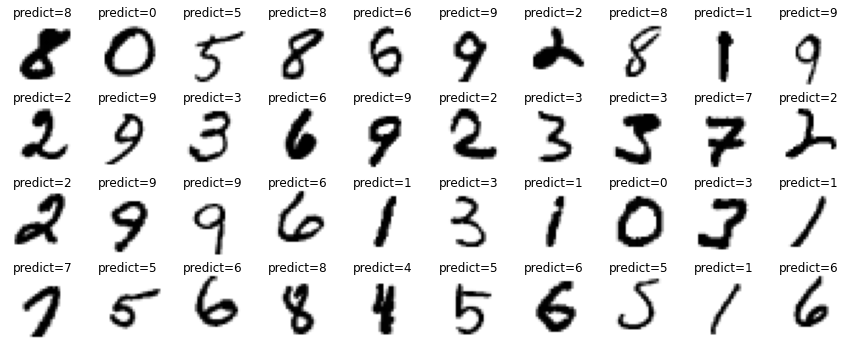

In [19]:
from matplotlib import cm

plt.figure(figsize=(15,6))
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.imshow(s_train_data[i][:,:,0], cmap=cm.binary)
    plt.title('predict=%d' %np.argmax(s_train_label[i]),y=0.9)
    plt.axis('off')
plt.show()    

# CNN

In [35]:
model=Sequential()

model.add(Lambda(standardize, input_shape=(28,28,1),output_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',padding='Same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='Same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='Same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

optimizer=RMSprop(learning_rate=0.001,
    rho=0.9,
    epsilon=1e-07)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=0.0001)

epochs = 30
batch_size = 512

In [50]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [51]:
datagen.fit(s_train_data)

In [52]:
import scipy.ndimage
history = model.fit_generator(datagen.flow(s_train_data,s_train_label, batch_size=batch_size),
                              epochs = epochs, validation_data = (s_val_data,s_val_label),
                              verbose = 2, steps_per_epoch=s_train_data.shape[0]
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
  117/59880 - 190s - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.2668 - val_accuracy: 0.9333


In [53]:
results=model.predict(test_data)

In [54]:
results=np.argmax(results,axis=1)

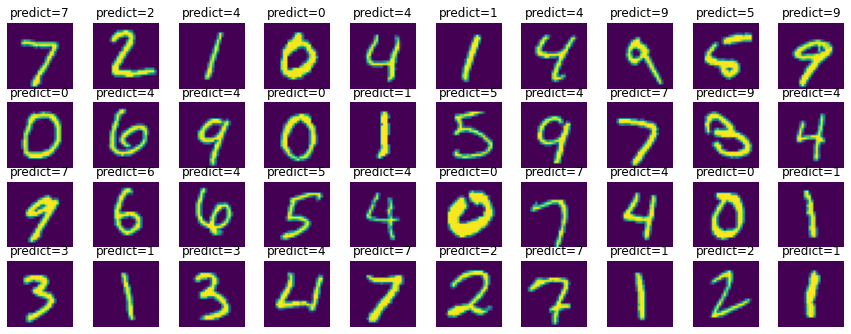

In [55]:
# Preview predictions
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(test_data[i][:,:,0])
    plt.title("predict=%d" % results[i],y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()